## EDA_실습 _TITANIC호 ¶

사례) 1912년 4월10일, 사우샘프턴 -> 뉴욕으로 향하던 첫 항해 중 빙산과 충돌하여 TITANIC호 침몰. 1,514명 사망, 해난 사고중 가장 큰 인명피해
- 데이터 셋 : Titanic.CSV (변수: 12, 자료 수: 891개)
- 종속변수 : Survived(생존여부, 0 = No, 1 = Yes) 

#### 분석목표 : 생존률에 영향을 미치는 영향인자 도출
- 가설1 : 선실등급은 생존에 영향을 주는 설명변수일 것이다
- 가설2 : 성별은 생존에 영향을 주는 설명변수일 것이다 
- 가설3 : 나이는 생존에 영향을 주는 설명변수일 것이다
- 가설4 : 승선장소는 생존에 영향을 주는 설명변수일 것이다
- 가설5 : 티켓 가격은 생존에 영향을 주는 설명변수일 것이다
- 가설6 : 함께탑승수(형제,배우자)는 생존에 영향을 주는 설명변수일 것이다 
- 가설7 : 함께탑승수(자녀,부모)는 생존에 영향을 주는 설명변수일 것이다

STEP 0 패키지 불러오기

In [1]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

In [2]:
# 한글 폰트(맑은고딕) 적용
matplotlib.rc('font', family='Malgun Gothic')

STEP 0 데이터 구성하기

In [4]:
# 데이터를 임포트 한다 (변수: 12, 자료 수: 891개)
df_data = pd.read_csv("D:/data/bigdata_data/Titanic.CSV", engine ="python")
df_data.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


STEP ❶ : 데이터 속성 및 기술통계량 확인

In [5]:
# 데이터의 타입을 체크 (명목형 변수 : object 또는 string, 수치형 변수 : int64 혹은 float64)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_data.describe().round(3)

,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,891.000
mean,29.759,0.523,0.382,32.204
std,13.003,1.103,0.806,49.693
min,0.420,0.000,0.000,0.000
25%,22.000,0.000,0.000,7.910
50%,30.000,0.000,0.000,14.454
75%,35.000,1.000,0.000,31.000
max,80.000,8.000,6.000,512.329


STEP ❸ : 변수들의 결측 및 이상치 처리

In [6]:
# 데이터의 타입을 변경  (명목형인데 int64로 잘못되어 있으므로 타입 변환)
df_data['Survived'] = df_data['Survived'].astype(object)
df_data['PassengerId'] = df_data['PassengerId'].astype(object)
df_data['Pclass'] = df_data['Pclass'].astype(object)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


In [ ]:
# 데이터 null값 확인
df_data.isnull().sum()

- ※ Cabin 변수가  687 행이 missing이고 Embarked가 2개의 행이 missing 확인.
- ※ Null 값이 있는 경우, 조치는 그 값을 빼고 하는지, 혹은 결측치를 대치 2개 방법으로 나눌 수 있음
- ※ 방법은 첫 번째 방법을 complete data analysis, 두 번째 방법을 Imputation 

In [7]:
# Embarked, isnull 결측치 처리
df_count = df_data["Embarked"].value_counts()
df_count

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
# Embarked , isnull 결측치 처리, 최빈수인 S를 대체 
df_data["Embarked"].fillna("S", inplace = True)
df_count = df_data["Embarked"].value_counts()
df_count

S    646
C    168
Q     77
Name: Embarked, dtype: int64

STEP ❷ : 목표변수 및 설명변수(범주형/연속형 변수별)의 분포 확인
- 목표변수 체크 (기본적으로 목표변수의 분포를 살펴봅) 
- 목표변수란 다른 변수들의 관계를 주로 추론하고, 최종적으로는 예측하고자 하는 변수

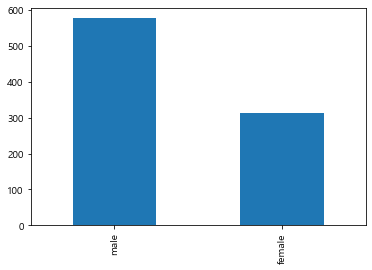

In [10]:
df_count = df_data["Sex"].value_counts()
df_count.plot.bar()

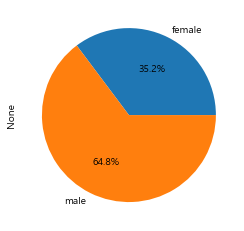

In [11]:
# 성별 Pie Chart
df_count = df_data.groupby(["Sex"]).size()
df_count.plot.pie(autopct="%.1f%%")

※ 여성 65%, 남성 35% 구성비

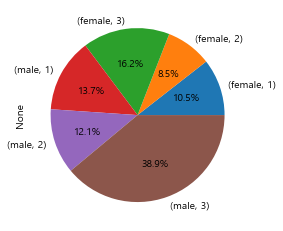

In [12]:
# 성별 + 승객등급 Pie Chart
df_count = df_data.groupby(["Sex","Pclass"]).size()
df_count.plot.pie(autopct="%.1f%%")

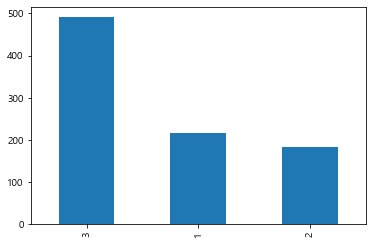

In [13]:
df_count = df_data["Pclass"].value_counts()
df_count.plot.bar()

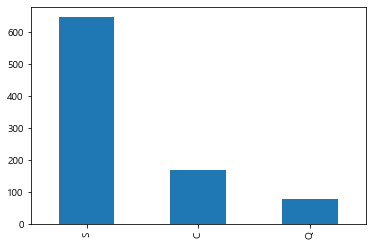

In [14]:
df_count = df_data["Embarked"].value_counts()
df_count.plot.bar()

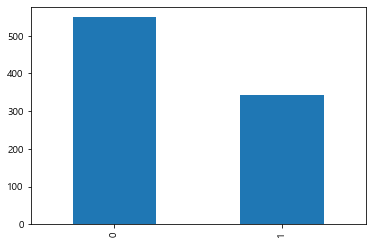

In [17]:
df_count = df_data['Survived'].value_counts()
df_count.plot.bar()

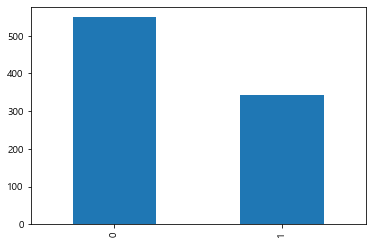

In [18]:
df_data['Survived'].value_counts().plot(kind='bar') 
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000270499B48E0>,
      dtype=object)

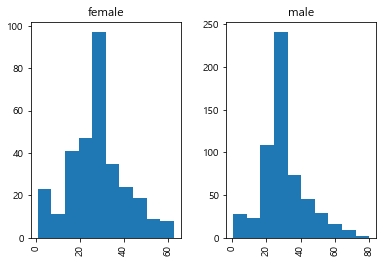

In [19]:
# 성별 승객 Age, Fare ,  hist(column = 변수, by = 그룹변수) 
df_data.hist(column="Age", by = "Sex")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027049A6A370>,
      dtype=object)

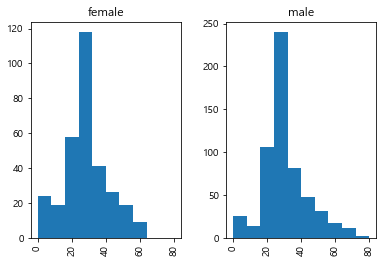

In [20]:
# hist(column = 변수, by = 그룹변수, range=(최소값, 최대값)) : X축 범위 통일
df_data.hist(column="Age", by = "Sex", range=(0,80))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000270499831C0>,
      dtype=object)

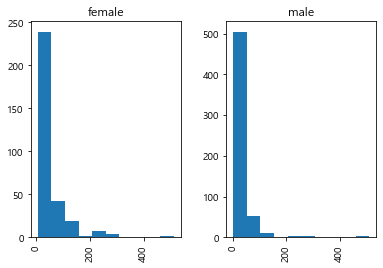

In [21]:
# 성별 승객 Age, Fare ,  hist(column = 변수, by = 그룹변수) 
df_data.hist(column="Fare", by = "Sex")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000270499CF280>,
      dtype=object)

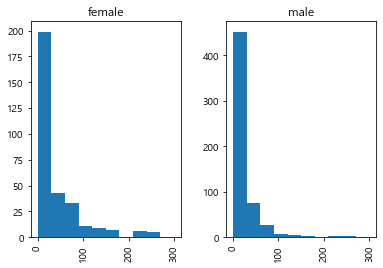

In [22]:
# hist(column = 변수, by = 그룹변수, range=(최소값, 최대값)) : X축 범위 통일
df_data.hist(column="Fare", by = "Sex", range=(0,300))

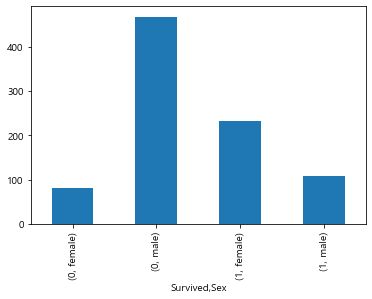

In [23]:
df_groupby_SS = df_data.groupby(["Survived", "Sex"], as_index = True).size()
df_groupby_SS.plot.bar()

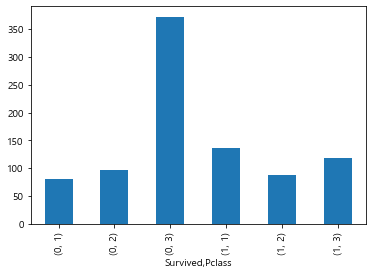

In [24]:
df_groupby_SP = df_data.groupby(["Survived", "Pclass"], as_index = True).size()
df_groupby_SP.plot.bar()

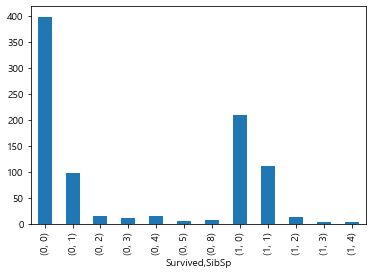

In [25]:
df_groupby_SS1 = df_data.groupby(["Survived", "SibSp"], as_index = True).size()
df_groupby_SS1.plot.bar()

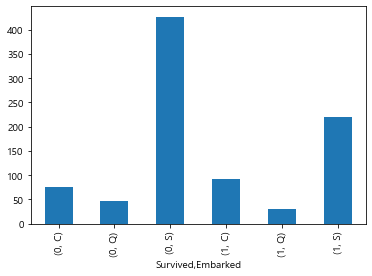

In [26]:
df_groupby_SE = df_data.groupby(["Survived", "Embarked"], as_index = True).size()
df_groupby_SE.plot.bar()

STEP ❹ : 그래프 분석을 통해 변수간 관계를 확인

- 생존률을 알기 위해 막대차트로 분석
- 범주형 features에 대한 막대차트 : pclass, sex, sibsp, parch, embarked, cabin

In [36]:
def bar_chart(feature):
    survived = df_data[df_data['Survived']==1][feature].value_counts()
    dead = df_data[df_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

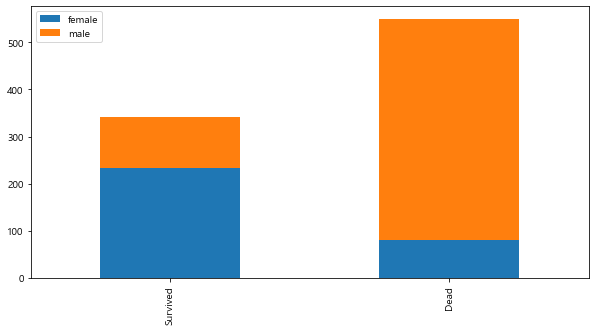

In [29]:
bar_chart('Sex')

※ 여성이 남성보다 생존할 가능성이 더 높다

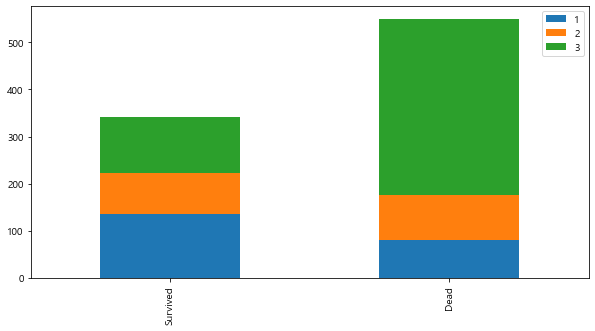

In [30]:
bar_chart('Pclass')

※ 1등급 보다 3등급이 사망할 가능성이 더 높다

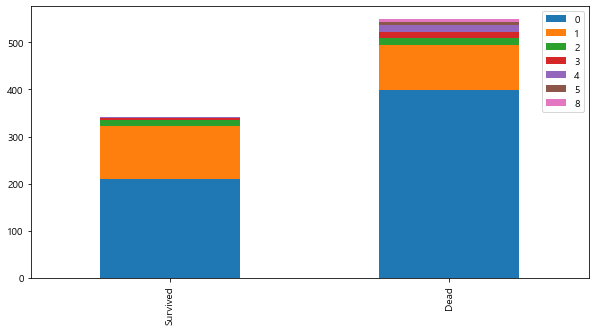

In [31]:
bar_chart('SibSp')

※ 혼자인 사람보다 형제나 배우자가 있는 사람들이 생존할 가능성이 더 높다

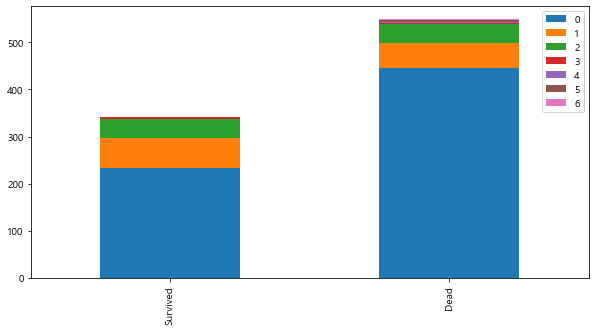

In [32]:
bar_chart('Parch')

※ 혼자인 사람보다 부모나 자식이 있는 사람들이 생존할 가능성이 더 높다

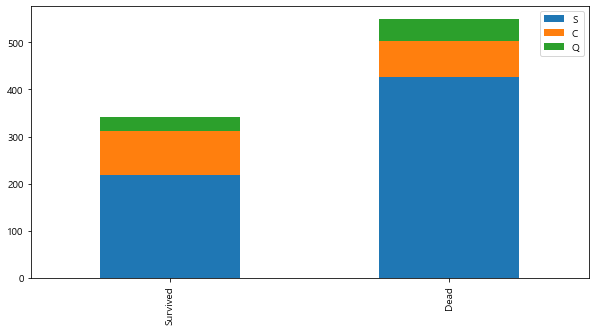

In [33]:
bar_chart('Embarked')

- ※ C 선착장 탑승자의 경우 생존자가 더 많지만 다른 선착장 탑승자는 죽은 사람이 더 많을 가능성을 보여준다
- ※ 여기 까지 우리는 탐색적 데이터 분석 과정에서 데이터 셋의 모양 확인, 타입을 확인하고 데이터의 Null값을 체크했다. 그리고 데이터 셋의 각 feature들이 생존(target)과 어떤 관계가 있는지 살펴보았다.

STEP ❹ : 그래프 분석을 통해 변수간 관계를 확인

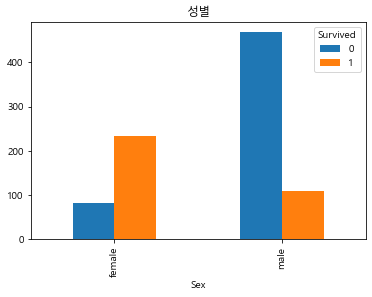

In [37]:
# 생존과 성별 관계 
sex_df = df_data.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived') 
sex_df.plot(kind='bar', figsize=(6,4)) 
plt.title('성별') 
plt.show()

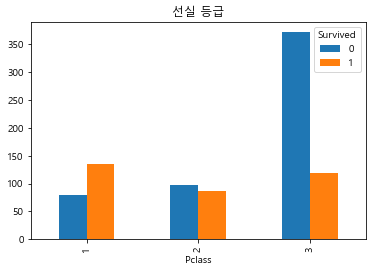

In [38]:
# 생존과 선실 등급
sex_df = df_data.groupby(['Pclass','Survived'])['Survived'].count().unstack('Survived') 
sex_df.plot(kind='bar', figsize=(6,4)) 
plt.title('선실 등급') 
plt.show()

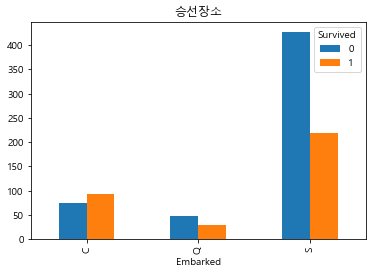

In [39]:
# 생존과 선실 등급
sex_df = df_data.groupby(['Embarked','Survived'])['Survived'].count().unstack('Survived') 
sex_df.plot(kind='bar', figsize=(6,4)) 
plt.title('승선장소') 
plt.show()

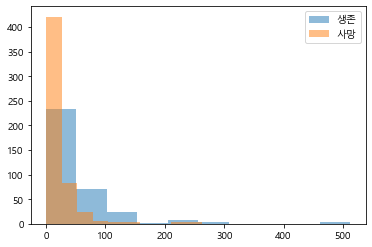

In [40]:
# 티켓요구별 생존 중첩의 Histogram 그리기
plt.hist(df_data[df_data["Survived"] == 1]["Fare"], label = "생존", alpha = 0.5)
plt.hist(df_data[df_data["Survived"] == 0]["Fare"], label = "사망", alpha = 0.5)
plt.legend()

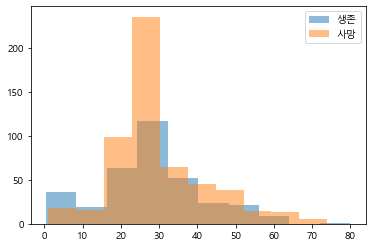

In [41]:
# 나이별 생존 중첩의 Histogram 그리기
plt.hist(df_data[df_data["Survived"] == 1]["Age"], label = "생존", alpha = 0.5)
plt.hist(df_data[df_data["Survived"] == 0]["Age"], label = "사망", alpha = 0.5)
plt.legend()

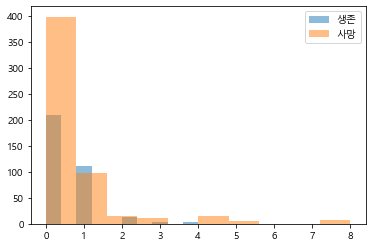

In [42]:
# 나이별 생존 중첩의 Histogram 그리기
plt.hist(df_data[df_data["Survived"] == 1]["SibSp"], label = "생존", alpha = 0.5)
plt.hist(df_data[df_data["Survived"] == 0]["SibSp"], label = "사망", alpha = 0.5)
plt.legend()

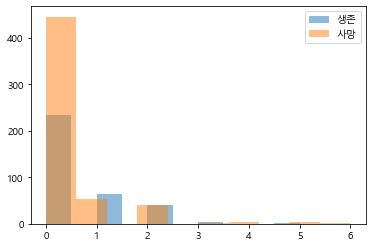

In [43]:
# 나이별 생존 중첩의 Histogram 그리기
plt.hist(df_data[df_data["Survived"] == 1]["Parch"], label = "생존", alpha = 0.5)
plt.hist(df_data[df_data["Survived"] == 0]["Parch"], label = "사망", alpha = 0.5)
plt.legend()

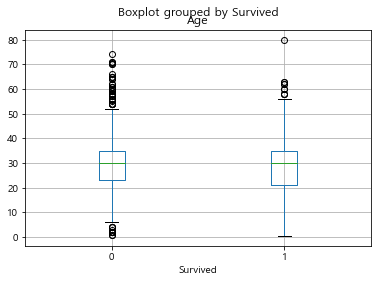

In [44]:
# 나이별, 생존 분포 boxplot
df_data.boxplot(column ="Age", by="Survived")

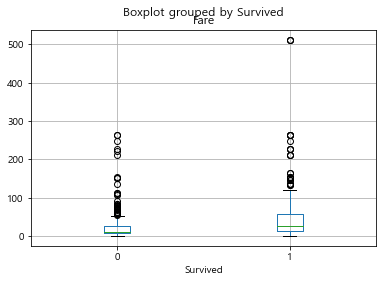

In [45]:
# 요금별, 생존 분포 boxplot
df_data.boxplot(column ="Fare", by="Survived")

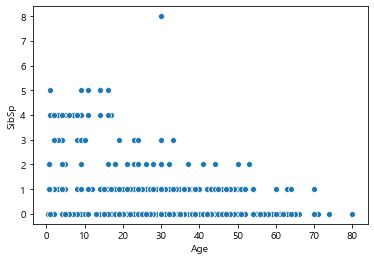

In [46]:
# seaborn.scatterplot method 이용, scatterplot ( x, y, data ) : 성별 무관
sns.scatterplot(x = "Age", y = "SibSp", data = df_data)

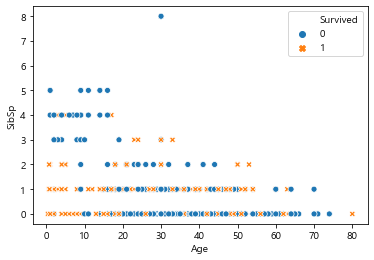

In [47]:
sns.scatterplot(x = "Age", y = "SibSp", hue = "Survived", style= "Survived", data = df_data)

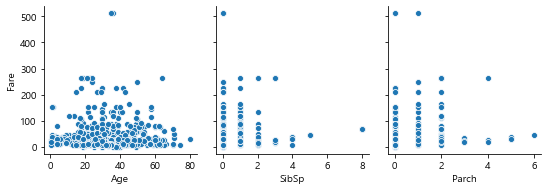

In [48]:
sns.pairplot(df_data , y_vars=["Fare"] , x_vars=["Age","SibSp","Parch"])

STEP ❺ : 생존에 영향을 미치는 잠재인자 도출

- 선실등급 : 1등급 보다 3등급이 사망할 가능성이 높음
- 성별 : 여성이 남성보다 생존할 가능성이 더 높음
- 나이 : 20~30 사이 사망 가능성이 높음
- 승선장소 : S (Southampton)에서 사망 가능성이 높음
- 티켓 요금 : 저비용(40 파운드 이내)에서 사망가능성이 높음 
- 함께탑승수(형제,배우자) : 단독 승객이 사망 가능성이 높음
- 함께탑승수(자녀,부모) : 단독 승객이 사망 가능성이 높음

이상입니다